In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = selected_features = df.drop(columns=["koi_disposition"])

# Create a Train Test Split

Use `koi_disposition` for the y values

<div style="height:auto;background-color:pink;border:2px solid;"> 
    <h2 style="text-align:center;color:orange;">NOTES:</h2>
    <ul> 
        <li>Since our Y values will be in the categorical forma we will need to convert this to numbers(enconding)</li> 
        <li>This Encoded values will be in ordinal format [0,1,2]</li> 
    </ul>
</div>

<h4 style="color:blue;">Converting Categorical Data(target) Numerical -- Encoding</h4>

In [6]:
# Target Values
y = df['koi_disposition'].astype('category').cat.codes

###### Encoded Categories

In [7]:
pd.DataFrame({'Category':df['koi_disposition'],'Encoded':y}).value_counts()

Category        Encoded
FALSE POSITIVE  2          3504
CONFIRMED       1          1800
CANDIDATE       0          1687
dtype: int64

In [8]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
from sklearn.preprocessing import MinMaxScaler  #importing MinMaxScaler, scaling data from [0-1]
def scale_minmax(X_values):
    return MinMaxScaler().fit(X_values)

In [11]:
# creating the scaler instance
min_max_scaler = scale_minmax(X_train)

In [12]:
X_train_scaled = min_max_scaler.transform(X_train)
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.66574567, 0.17604958,
        0.64129267],
       [0.        , 1.        , 0.        , ..., 0.21268467, 0.37354005,
        0.72766344],
       [1.        , 0.        , 0.        , ..., 0.71596223, 0.15268835,
        0.5069014 ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.792823  , 0.59720043,
        0.30217373],
       [1.        , 0.        , 0.        , ..., 0.77821733, 0.29000226,
        0.52153071],
       [0.        , 0.        , 1.        , ..., 0.68082222, 0.27185353,
        0.61930738]])

In [13]:
# The same instance of the transformer can then be applied to some new test data unseen during the fit call:
# the same scaling and shifting operations will be applied to be consistent with the transformation performed on the 
# train data --> https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
X_test_scaled = min_max_scaler.transform(X_test)
X_test_scaled

array([[1.        , 0.        , 0.        , ..., 0.71935671, 0.78182436,
        0.7335317 ],
       [0.        , 0.        , 0.        , ..., 0.81490723, 0.65788966,
        0.67575833],
       [0.        , 0.        , 1.        , ..., 0.52590633, 0.93147304,
        0.74427639],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69767242, 0.2535126 ,
        0.58550293],
       [0.        , 0.        , 0.        , ..., 0.67275473, 0.27116045,
        0.63294487],
       [0.        , 0.        , 0.        , ..., 0.56882006, 0.34870286,
        0.62269609]])

# Train the Model



In [14]:
from sklearn.neighbors import KNeighborsClassifier
# compute classification accuracy
from sklearn import metrics

<h2 style="color:blue;"> KNN Optimal K Value </h2>

In [15]:
k_range = range(1,26)
scores = []
for k in (k_range):
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train_scaled,y_train)
    y_pred_ = knn_.predict(X_test_scaled)
    scores.append(metrics.accuracy_score(y_test,y_pred_))
print(scores)

[0.790045766590389, 0.7637299771167048, 0.8112128146453089, 0.8054919908466819, 0.8197940503432495, 0.8175057208237986, 0.8232265446224256, 0.8220823798627003, 0.8278032036613272, 0.8255148741418764, 0.8278032036613272, 0.818649885583524, 0.8220823798627003, 0.8237986270022883, 0.8243707093821511, 0.8289473684210527, 0.8272311212814645, 0.8260869565217391, 0.8243707093821511, 0.8272311212814645, 0.8226544622425629, 0.8237986270022883, 0.8255148741418764, 0.8249427917620137, 0.8237986270022883]


In [16]:
optimal_K = scores.index(sorted(scores, reverse=True)[0]) +1
optimal_K

16

Text(0, 0.5, 'Testing Accuracy')

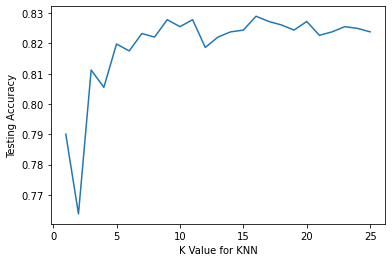

In [17]:
plt.plot(k_range,scores)
plt.xlabel("K Value for KNN")
plt.ylabel("Testing Accuracy")

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_K)

In [19]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=16)

In [20]:
y_predict = knn_model.predict(X_test_scaled)

In [21]:
print(metrics.accuracy_score(y_test,y_predict))

0.8289473684210527


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [23]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [24]:
# instantiate the grid
grid = GridSearchCV(knn_model, param_grid, cv=20, scoring='accuracy',n_jobs = -1,verbose=5)

In [25]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 20 folds for each of 30 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished


GridSearchCV(cv=20, estimator=KNeighborsClassifier(n_neighbors=16), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=5)

In [26]:
# List the best parameters for this dataset
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 22}
0.8258547876817695


In [27]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.788857,0.015706,{'n_neighbors': 1}
1,0.779508,0.019565,{'n_neighbors': 2}
2,0.806964,0.020799,{'n_neighbors': 3}
3,0.808496,0.019157,{'n_neighbors': 4}
4,0.814025,0.017886,{'n_neighbors': 5}
5,0.818027,0.023718,{'n_neighbors': 6}
6,0.813834,0.021125,{'n_neighbors': 7}
7,0.816689,0.025603,{'n_neighbors': 8}
8,0.820316,0.023827,{'n_neighbors': 9}
9,0.820505,0.027290,{'n_neighbors': 10}


# Save the Model

In [28]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

NameError: name 'your_model' is not defined